In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf
from tensorflow import keras

In [2]:
training_features = pd.read_csv('dengue_features_train.csv')
training_labels = pd.read_csv('dengue_labels_train.csv')
train_df = pd.concat([training_features,training_labels],axis = 1)
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city,year,weekofyear,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6


In [3]:
print(f"Number of columns: {train_df.shape[1]}")
print(f"Number of rows:{train_df.shape[0]}")

Number of columns: 28
Number of rows:1456


In [4]:
train_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,year,weekofyear,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,2001.031593,26.503434,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,5.408314,15.019437,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,2010.000000,53.000000,461.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

### Description of features from DataDriven
<b>City and date indicators</b>
<ul>
    <li>city – City abbreviations: sj for San Juan and iq for Iquitos</li>
    <li>week_start_date – Date given in yyyy-mm-dd format</li>
</ul>

<b>NOAA's GHCN daily climate data weather station measurements</b>
<ul>
    <li>station_max_temp_c – Maximum temperature</li>
    <li>station_min_temp_c – Minimum temperature</li>
    <li>station_avg_temp_c – Average temperature</li>
    <li>station_precip_mm – Total precipitation</li>
    <li>station_diur_temp_rng_c – Diurnal temperature range</li>
</ul>

<b>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</b>
<ul>
    <li>precipitation_amt_mm – Total precipitation</li>
</ul>

<b>NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</b>
<ul>
    <li>reanalysis_sat_precip_amt_mm – Total precipitation</li>
    <li>reanalysis_dew_point_temp_k – Mean dew point temperature</li>
    <li>reanalysis_air_temp_k – Mean air temperature</li>
    <li>reanalysis_relative_humidity_percent – Mean relative humidity</li>
    <li>reanalysis_specific_humidity_g_per_kg – Mean specific humidity</li>
    <li>reanalysis_precip_amt_kg_per_m2 – Total precipitation</li>
    <li>reanalysis_max_air_temp_k – Maximum air temperature</li>
    <li>reanalysis_min_air_temp_k – Minimum air temperature</li>
    <li>reanalysis_avg_temp_k – Average air temperature</li>
    <li>reanalysis_tdtr_k – Diurnal temperature range</li>
</ul>
<b>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</b>
<ul>
    <li>ndvi_se – Pixel southeast of city centroid</li>
    <li>ndvi_sw – Pixel southwest of city centroid</li>
    <li>ndvi_ne – Pixel northeast of city centroid</li>
    <li>ndvi_nw – Pixel northwest of city centroid</li>
</ul>

<AxesSubplot:>

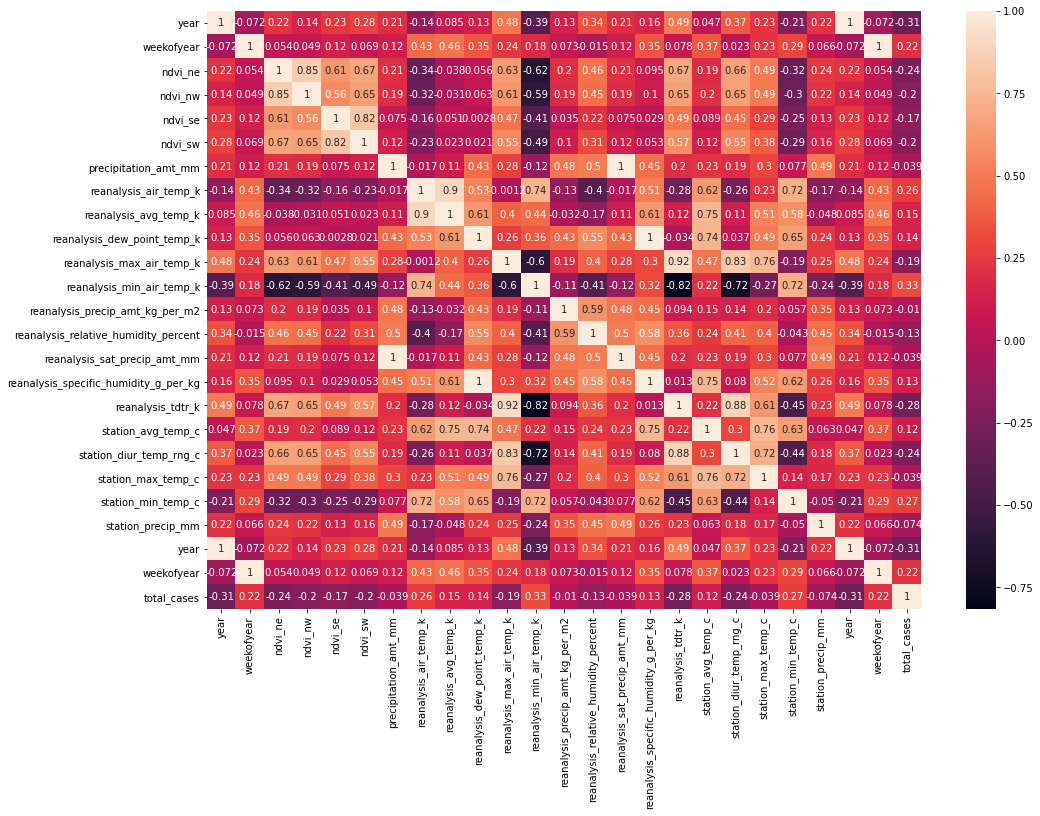

In [6]:
# Correlation Matrix
corr = train_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(corr,annot=True)

In [7]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [8]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [9]:
def find_high_correlated_features(dataset,threshold):
    cor_cols = set() #Using set for unique columns
    corr_matrix = dataset.corr() #Correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname = dataset.columns[i]
                cor_cols.add(colname)
    return cor_cols

In [10]:
to_drop = find_high_correlated_features(X_train,0.75)

In [11]:
# Drop features 
X_train.drop(X_train[to_drop], axis=1,inplace = True)


C:\Users\tawsi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
X_test.drop(X_test[to_drop], axis=1, inplace=True)

<AxesSubplot:>

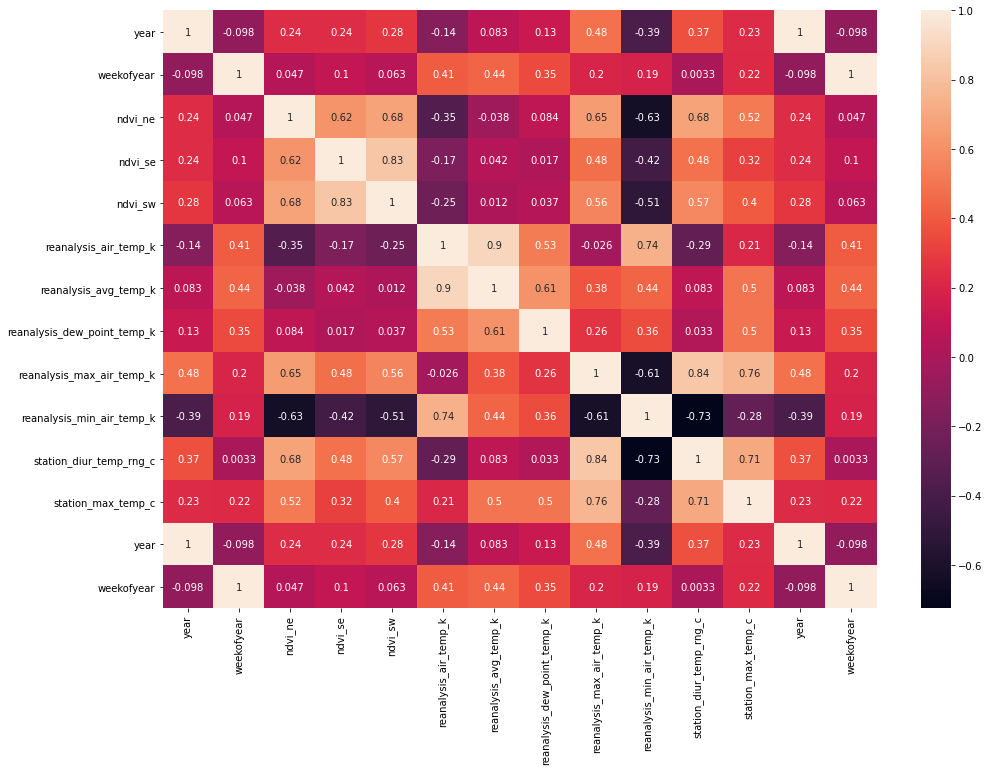

In [13]:
# Correlation Matrix
corr = X_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(corr,annot=True)

In [14]:
X_train.drop(X_train['year'],axis = 1,inplace = True)
X_test.drop(X_test['year'],axis = 1,inplace = True)
X_train.head()

,city,weekofyear,ndvi_ne,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,station_diur_temp_rng_c,station_max_temp_c,city,weekofyear
579,sj,25,-0.028650,0.124657,0.125557,299.918571,299.864286,295.207143,302.0,297.4,6.928571,31.7,sj,25
581,sj,27,-0.022700,0.206914,0.188229,300.207143,300.278571,296.354286,302.5,298.1,6.757143,32.8,sj,27
966,iq,5,0.341500,0.329386,0.369071,295.297143,296.100000,294.411429,302.2,292.2,9.666667,33.0,iq,5
742,sj,32,0.005800,0.174100,0.183814,300.588571,300.642857,296.600000,302.7,298.4,6.585714,32.2,sj,32
1401,iq,24,0.187129,0.143457,0.199471,295.104286,295.778571,293.910000,305.2,289.9,8.633333,33.5,iq,24


In [15]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]  #Remove duplicate year and week of year columns from the training set
X_test = X_test.loc[:,~X_test.columns.duplicated()]    #Remove duplicate year and week of year columns from the test set

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['city'] = le.fit_transform(X_train["city"])

In [17]:
X_train.head()

,city,weekofyear,ndvi_ne,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,station_diur_temp_rng_c,station_max_temp_c
579,1,25,-0.028650,0.124657,0.125557,299.918571,299.864286,295.207143,302.0,297.4,6.928571,31.7
581,1,27,-0.022700,0.206914,0.188229,300.207143,300.278571,296.354286,302.5,298.1,6.757143,32.8
966,0,5,0.341500,0.329386,0.369071,295.297143,296.100000,294.411429,302.2,292.2,9.666667,33.0
742,1,32,0.005800,0.174100,0.183814,300.588571,300.642857,296.600000,302.7,298.4,6.585714,32.2
1401,0,24,0.187129,0.143457,0.199471,295.104286,295.778571,293.910000,305.2,289.9,8.633333,33.5


In [18]:
X_test["city"] = le.transform(X_test["city"])

In [19]:
#Checking for missing values
print(X_train.isnull().sum())

city                             0
weekofyear                       0
ndvi_ne                        145
ndvi_se                         19
ndvi_sw                         19
reanalysis_air_temp_k            9
reanalysis_avg_temp_k            9
reanalysis_dew_point_temp_k      9
reanalysis_max_air_temp_k        9
reanalysis_min_air_temp_k        9
station_diur_temp_rng_c         33
station_max_temp_c              16
dtype: int64


<AxesSubplot:>

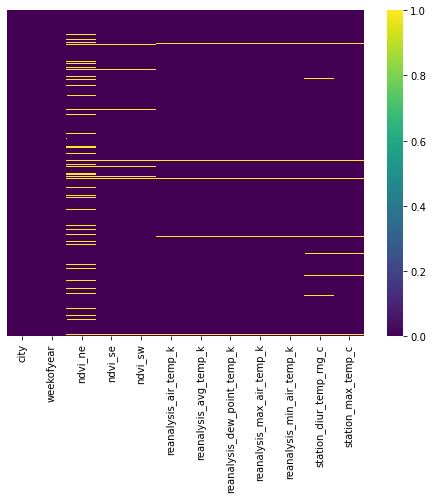

In [20]:
#Visualise missing values
plt.figure(figsize=(8,6))
sns.heatmap(X_train.isnull(),yticklabels=False,cmap='viridis')

In [21]:
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis = 1)

In [22]:
#Dropping the columns with air temperature, dew point and min max temperature as missing values
train_data.dropna(subset = ['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'], how = 'all',inplace = True)

In [23]:
train_data.fillna(X_train.mean(), inplace=True)
train_data.isnull().sum()

city                           0
weekofyear                     0
ndvi_ne                        0
ndvi_se                        0
ndvi_sw                        0
reanalysis_air_temp_k          0
reanalysis_avg_temp_k          0
reanalysis_dew_point_temp_k    0
reanalysis_max_air_temp_k      0
reanalysis_min_air_temp_k      0
station_diur_temp_rng_c        0
station_max_temp_c             0
total_cases                    0
dtype: int64

In [24]:
#Dropping the columns with air temperature, dew point and min max temperature as missing values in test data
test_data.dropna(subset = ['reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'], how = 'all',inplace = True)

In [25]:
test_data.fillna(X_test.mean(), inplace=True)
test_data.isnull().sum()

city                           0
weekofyear                     0
ndvi_ne                        0
ndvi_se                        0
ndvi_sw                        0
reanalysis_air_temp_k          0
reanalysis_avg_temp_k          0
reanalysis_dew_point_temp_k    0
reanalysis_max_air_temp_k      0
reanalysis_min_air_temp_k      0
station_diur_temp_rng_c        0
station_max_temp_c             0
total_cases                    0
dtype: int64

In [26]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [36]:
X_train.head()

,city,weekofyear,ndvi_ne,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,station_diur_temp_rng_c,station_max_temp_c
579,1,25,-0.028650,0.124657,0.125557,299.918571,299.864286,295.207143,302.0,297.4,6.928571,31.7
581,1,27,-0.022700,0.206914,0.188229,300.207143,300.278571,296.354286,302.5,298.1,6.757143,32.8
966,0,5,0.341500,0.329386,0.369071,295.297143,296.100000,294.411429,302.2,292.2,9.666667,33.0
742,1,32,0.005800,0.174100,0.183814,300.588571,300.642857,296.600000,302.7,298.4,6.585714,32.2
1401,0,24,0.187129,0.143457,0.199471,295.104286,295.778571,293.910000,305.2,289.9,8.633333,33.5


In [27]:
#train_data.dropna(inplace=True)

In [28]:
#test_data.dropna(inplace=True)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
#train_data_scaled = sc.fit_transform(train_data)
#test_data_scaled = sc.transform(test_data)

In [31]:
#X_train_scaled = train_data_scaled[:,:-1]
#y_train_scaled = train_data_scaled[:,-1]

#X_test_scaled = test_data_scaled[:,:-1]
#y_test_scaled = test_data_scaled[:,-1]

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_model = DecisionTreeRegressor(random_state=0)
print(f'Cross validation scores for Decision Tree Model: {cross_val_score(tree_model,X_train.values,y_train.values,cv=5)}')

Cross validation scores for Decision Tree Model: [-0.20974527  0.34532668 -0.17225404  0.27035238 -0.55085761]


In [33]:
from sklearn.ensemble import RandomForestRegressor 
forest_model = RandomForestRegressor(random_state=0)
print(f'Cross validation scores for Random Forest Model: {cross_val_score(forest_model,X_train.values,y_train.values,cv=5)}')

Cross validation scores for Random Forest Model: [0.25899748 0.47427601 0.45941698 0.55916303 0.39667157]


In [35]:
from sklearn.svm import SVR
svr_model = SVR()
print(f'Cross validation scores for  SVR Model: {cross_val_score(svr_model,X_train.values,y_train.values, cv=5)}')

Cross validation scores for  SVR Model: [-0.07410381 -0.06524502 -0.11501546 -0.0652016  -0.09851022]


In [37]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
cross_val_score(RandomForestRegressor(random_state = 0),X_train.values,y_train.values,cv=cv)

array([0.48973635, 0.15331103, 0.41257494, 0.03357508, 0.52409902])

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train.values,y_train.values)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [43]:
cross_val_score(RandomForestRegressor(n_estimators = 400, min_samples_split= 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = False, random_state = 0),X_train.values,y_train.values,cv=cv)

array([0.54160874, 0.13517308, 0.51677632, 0.21332033, 0.68072252])

In [44]:
forest_model_tuned = RandomForestRegressor(n_estimators = 400,
                                           min_samples_split= 2, 
                                           min_samples_leaf = 1, 
                                           max_features = 'sqrt', 
                                           max_depth = None, 
                                           bootstrap = False, 
                                           random_state = 0) 

In [45]:
forest_model_tuned.fit(X_train.values,y_train.values)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400,
                      random_state=0)

In [47]:
y_pred = forest_model_tuned.predict(X_test.values)

In [48]:
pd.DataFrame([y_test.values,y_pred])

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,361,362
0,4.0000,0.0000,426.0000,25.00,27.0000,16.00,0.00,9.0000,7.00,17.0000,...,37.0000,20.00,9.0000,16.0000,2.00,4.0000,6.000,15.000,10.0000,11.0000
1,21.7725,7.1275,112.8525,21.75,26.4575,23.09,22.84,21.8625,44.72,13.2675,...,25.2075,20.48,7.3975,7.5975,9.35,32.3825,6.735,11.525,8.0425,12.9175


In [49]:
prediction_actual_df = pd.DataFrame([y_test.values,y_pred]).transpose()

In [51]:
prediction_actual_df.head(10)

,0,1
0,4.0,21.7725
1,0.0,7.1275
2,426.0,112.8525
3,25.0,21.7500
4,27.0,26.4575
5,16.0,23.0900
6,0.0,22.8400
7,9.0,21.8625
8,7.0,44.7200
9,17.0,13.2675


In [56]:
(y_test == 0.0).sum()

23

(array([316.,  31.,   8.,   4.,   1.,   0.,   1.,   0.,   1.,   1.]),
 array([  0. ,  42.6,  85.2, 127.8, 170.4, 213. , 255.6, 298.2, 340.8,
        383.4, 426. ]),
 <BarContainer object of 10 artists>)

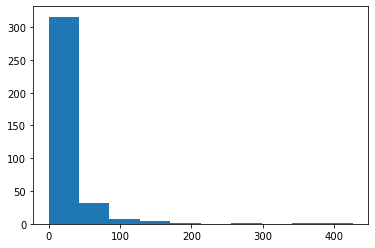

In [57]:
plt.hist(y_test)

(array([[363.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [222., 141.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [363.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [363.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [363.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 363.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 363.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 363.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 363.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 363.],
        [363.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [102., 261.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([-2.870000e-01,  3.114170e+01,  6.257040e+01,  9.399910e+01,
         1.254278e+02,  1.568565e+02,  1.882852e+02,  2.197139e+02,
         2.511426e+02,

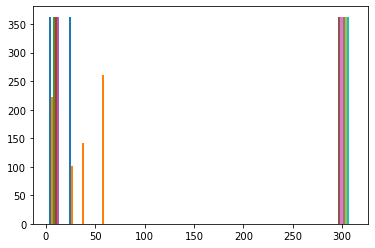

In [58]:
plt.hist(X_test)

In [59]:
forest_model_tuned.score(X_test.values,y_test.values)

0.41701183788949236